The objective of this first section of lab 3 is to introduce exploratory data analysis, linear regression and logistic regression using the scikit-learn (sklearn) Python library on a real-world dataset.

Dataset:
For this lab, we will use the well-known Iris dataset, which is readily available in Scikit-learn. The Iris dataset consists of 150 samples of iris flowers, each with four features (sepal length, sepal width, petal length, and petal width), and a target variable indicating the species of iris. For more details, see [the iris dataset on sklearn docs](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

***ALGORITHMS USED***


1.   Linear Regression: Linear regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features.
It assumes a linear relationship between the input features and the target variable.
The goal of linear regression is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the actual and predicted values.

2.   Logistic Regression: Logistic regression is a supervised learning algorithm used for binary classification tasks, where the target variable has two possible outcomes (classes).
Despite its name, logistic regression is used for classification, not regression, except that a logistic regression produces the probability that a given input instance belongs to a particular class using a logistic (sigmoid) function. Generally, we interpret this as the probability of the "1" class.

***Load Dataset***

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
##YOUR CODE HERE
##Load the iris dataset
iris = load_iris()
##SEPERATE INPUT FEATURES AND TARGET LABELS
## X: This variable represents the input features of the dataset.
##In the context of the Iris dataset, X contains the measurements/features of the flowers.
## Each row of X corresponds to a sample (i.e., a flower),
## and each column represents a feature (e.g., sepal length, sepal width, petal length, petal width).
##y: This variable represents the target variable or the labels of the dataset.
##In the context of the Iris dataset, y contains the class labels for each sample in X.
##Each entry in y corresponds to the class (species) of the corresponding flower in X.
X =  iris.data
y = iris.target

***Exploratory Data Analysis***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Convert iris dataset into a pandas DataFrame for easier analysis

iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['species'] = iris_df['target'].map(dict(enumerate(iris.target_names)))

## Describe summary statistics
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
## Check for missing values
missing_values = iris_df.isnull().sum()
missing_values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [5]:
## Drop empty rows if any
'YOUR CODE HERE'


'YOUR CODE HERE'

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


* Pairplot of Iris Dataset Features: This pairplot provides a quick overview of the relationships between pairs of features in the Iris dataset.
Each scatterplot represents the relationship between two features, with different colors indicating different species of iris flowers.
Pairplots are useful for identifying patterns, trends, and potential correlations between features, which can help in understanding the data distribution and deciding which features to include in the analysis. Refer to [seaborn docs](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

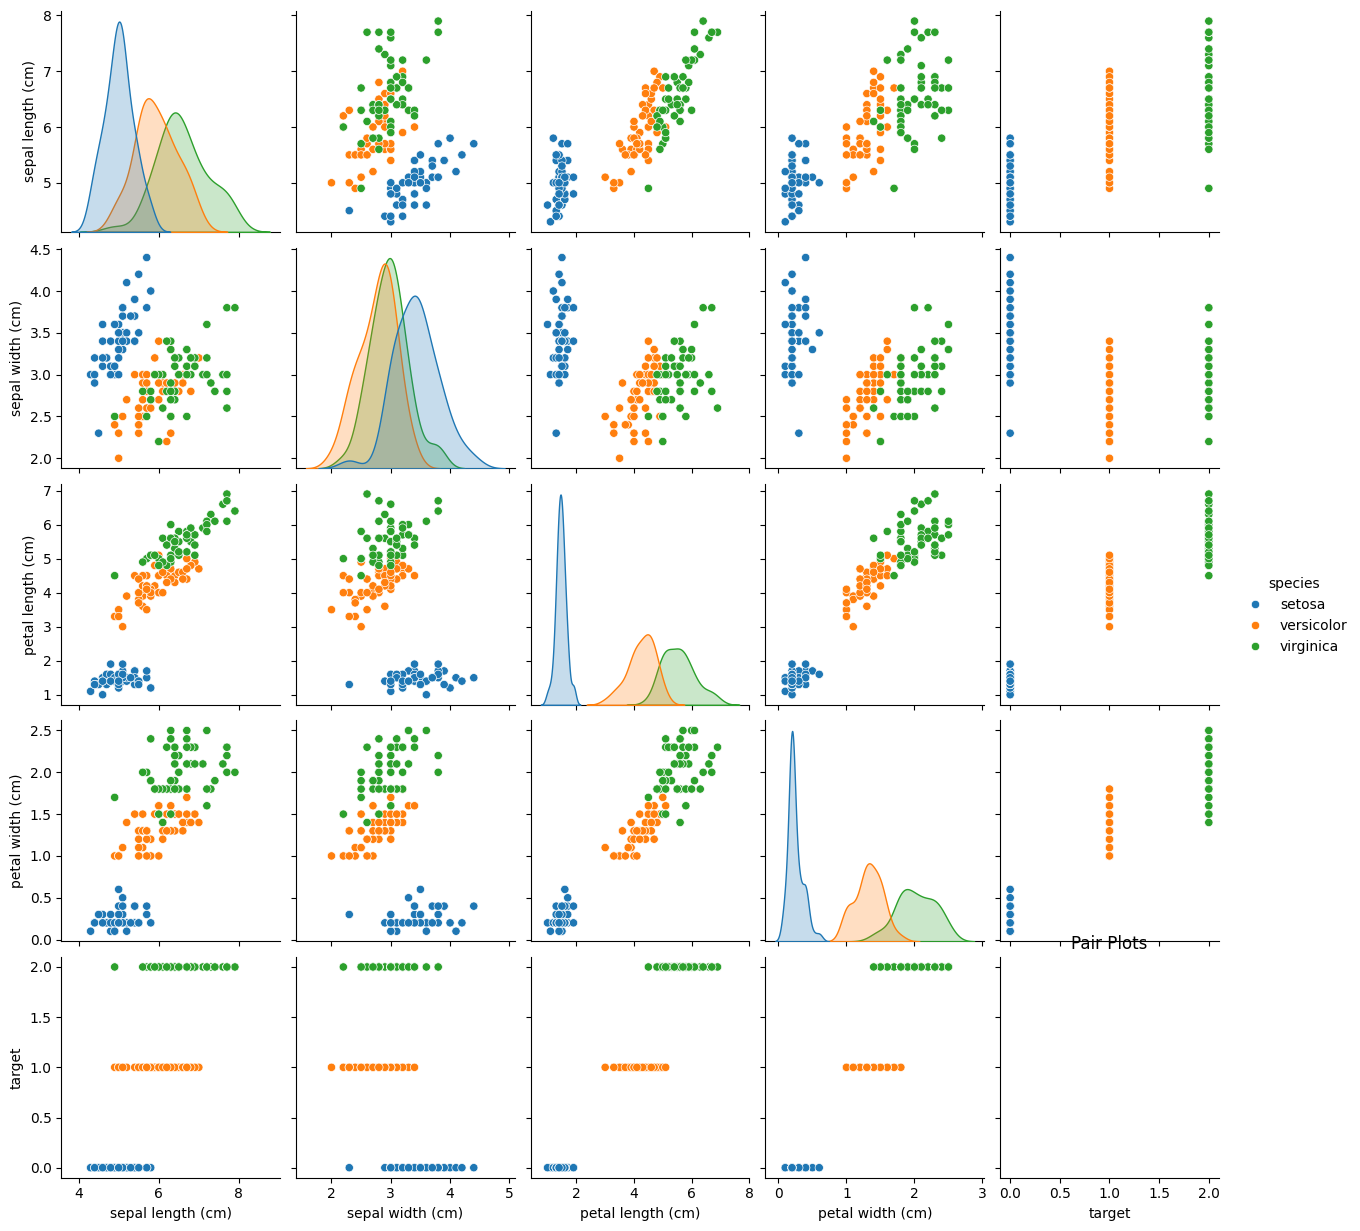

In [7]:
sns.pairplot(iris_df, hue='species')
plt.title('Pair Plots')
plt.show()

* Correlation Matrix Heatmap: The correlation matrix heatmap visualizes the correlation coefficients between pairs of features in the Iris dataset.
It provides insights into the strength and direction of linear relationships between features.
High positive correlation values (close to 1) indicate strong positive linear relationships, while high negative correlation values (close to -1) indicate strong negative linear relationships.
Features with high correlation coefficients may be redundant and can potentially be removed to simplify models or improve interpretability. Pandas has a built in method to obtain correlations (refer to [the docs here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)).

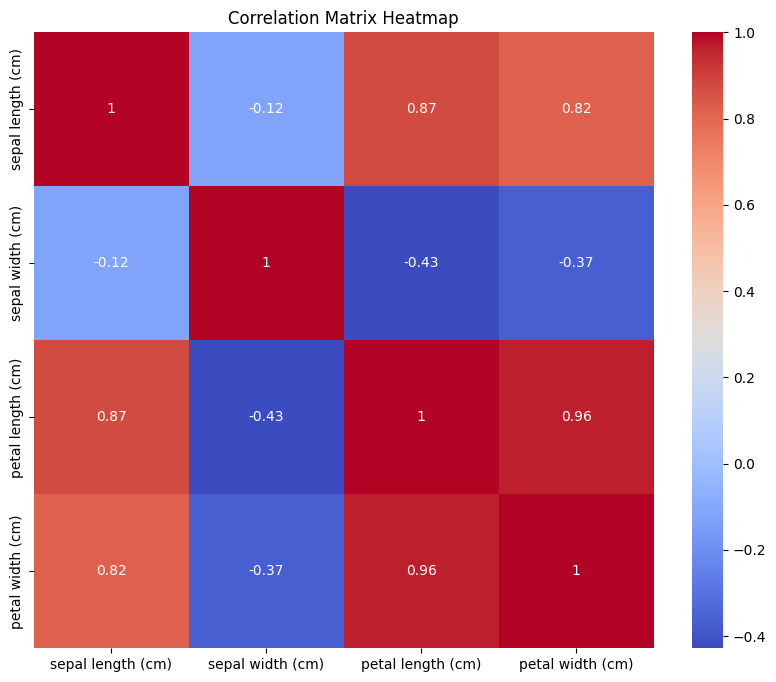

In [8]:
corr_matrix = iris_df.drop(['target', 'species'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

* Boxplot for Each Feature Grouped by Species:
Boxplots provide a graphical representation of the distribution of each feature, broken down by the species of iris flowers.
They show the median, quartiles, and potential outliers for each feature within each species.
Boxplots help in comparing the distributions of features across different categories (species in this case) and identifying any variations or differences. Refer to [the seaborn boxplots docs here](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

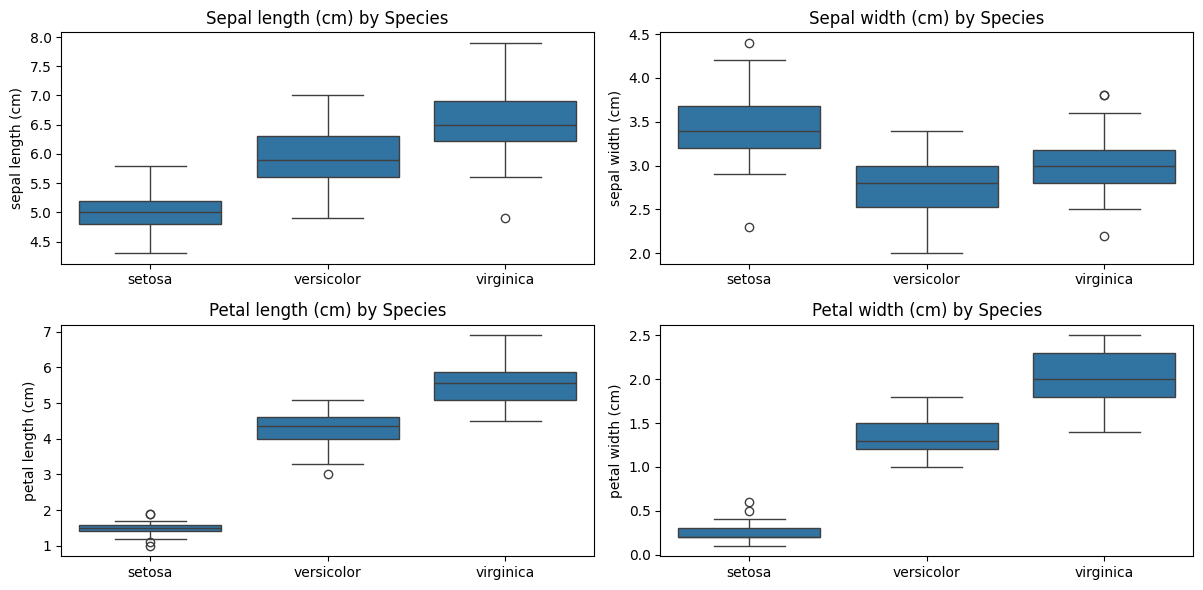

In [9]:
plt.figure(figsize=(12, 6))
features = iris.feature_names
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f"{feature.capitalize()} by Species")
    plt.xlabel('')
plt.tight_layout()
plt.show()

***Data preprocessing***

Standardization of iput features is a technique often employed for several machine learning methods to ensure that all features have the same scale.
By standardizing the features, we prevent features with larger scales from dominating the learning process and ensure that all features contribute equally to the model's performance.
After scaling, X_scaled contains the standardized features where each feature has a mean of 0 and a standard deviation of 1. Refer to [the scaler docs here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Describe the standardized features
X_describe = pd.DataFrame(data=X_scaled, columns=iris.feature_names)
X_describe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


***METRICS FOR LINEAR REGRESSION***



1.   Mean Squared Error (MSE):Mean Squared Error is a measure of the average squared difference between the actual and predicted values in a regression problem.
It is calculated by taking the average of the squared differences between the actual target values and the predicted target values.
MSE is a commonly used metric to evaluate the performance of regression models.
A lower MSE indicates that the model's predictions are closer to the actual values, implying better model performance.


2.   R-squared (R2):R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the regression model.
It ranges from 0 to 1, where 0 indicates that the model does not explain any variance in the target variable, and 1 indicates that the model perfectly explains all the variance in the target variable.
R-squared is a measure of how well the independent variables explain the variability of the dependent variable.
A higher R-squared value indicates a better fit of the regression model to the data.


Useful Docs:\
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)\
[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)\
[metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)


***Linear Regression***

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an instance of linear regression
lin_reg = LinearRegression()

# Fit the training data
lin_reg.fit(X_train, y_train)

# Predict the y target variable on the test data
y_pred = lin_reg.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.03711379440797687
R-squared: 0.9468960016420045


***METRICS FOR LOGISTIC REGRESSION***



1.   Accuracy: Accuracy measures the proportion of correctly predicted instances out of the total instances.
It is calculated as the ratio of the number of correct predictions to the total number of predictions.
Accuracy is a commonly used metric for evaluating classification models when the class distribution is balanced.
However, it may not be suitable for imbalanced datasets where the classes are unevenly distributed.
2.   Confusion Matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing predicted classes to actual classes.
It is useful for understanding where the model is making errors and which classes are being confused with each other.
The confusion matrix has four components: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

3.   Precision: Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
It is calculated as the ratio of true positives to the sum of true positives and false positives.
Precision is useful when the cost of false positives is high, and we want to minimize the number of false positives.
4.   Recall (Sensitivity): Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.
It is calculated as the ratio of true positives to the sum of true positives and false negatives.
Recall is useful when the cost of false negatives is high, and we want to minimize the number of false negatives.


***Logistic Regression***\
[LogisticRegression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Create an instance of logistic regression
log_reg = LogisticRegression(max_iter=200)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict the y target variable on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' to handle multiclass classification
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Pytorch

In this section we will explore a popular tensor manipulation and deep learning library called PyTorch. PyTorch is an open-source machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing, originally developed by Meta AI and now part of the Linux Foundation umbrella.

Recall that training a neural network involves a large number of tensor computation ranging from simple operations like adding and multiplying tensors to slightly complex ones like tracking and updating gradients. PyTorch is an excellent framework to help us with that. Let's dive right into the world of tensors! 💪

For the following excercises, refer to the official documentation here: https://pytorch.org/docs/stable/index.html

In [13]:
import torch
import numpy as np

#### Creating and manipulating tensors

Creating and manipulating tensors is very similar to numpy operations. In fact, pytorch offers several "numpy like" functions to make your life easy.

In [14]:
x = [[1,2,3],[4,5,6],[7,8,9]]
x_tensor = torch.tensor(x)

print(x)
print(x_tensor)
print(x_tensor[0])
print(f"Shape of tensor: {x_tensor.shape}")
print(f"Datatype of tensor: {x_tensor.dtype}")
print(f"Device tensor is stored on: {x_tensor.device}")
print(f"First row: {x_tensor[0]}")
print(f"First column: {x_tensor[:, 0]}")
print(f"Last column: {x_tensor[..., -1]}")

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
Shape of tensor: torch.Size([3, 3])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu
First row: tensor([1, 2, 3])
First column: tensor([1, 4, 7])
Last column: tensor([3, 6, 9])


You can convert numpy arrays into torch tensors as well!

In [15]:
x = np.arange(1, 9)
x_tensor = torch.from_numpy(x)

print(x)
print(x_tensor)

[1 2 3 4 5 6 7 8]
tensor([1, 2, 3, 4, 5, 6, 7, 8])


PyTorch has functions to generate random tensors or create arranged tensors just like numpy. In the following cell, generate tensors as described.

In [16]:
# Generate values using pytorch

x1 = torch.arange(10, 51, 2) #'1 dimensional tensor with values starting from 10 and going upto 50 with a step size of 2'
x2 = torch.randn(5, 3) # 'A tensor with random numbers from a normal distribution with mean 0 and variance 1 and shape (5, 3)'
x3 = torch.ones(5, 3)  # 'A tensor of shape (5, 3) filled with 1'
x4 = torch.zeros(5, 3) # 'A tensor of shape (5, 3) filled with 0'


print(x1)
print(x2)
print(x3)
print(x4)

tensor([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44,
        46, 48, 50])
tensor([[-0.2077,  1.3729,  0.4803],
        [-0.3220,  2.0261, -1.3398],
        [ 0.9401, -0.8768,  2.0766],
        [-0.1993,  1.2993,  0.1856],
        [ 1.1084, -0.5050, -0.6142]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


To enable GPU acceleration on your machine you will have to move your tensors to GPU. This can be using the following piece of code:

For non Apple silicon machines:

```
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
```

For Apple silicon machines:
```
if torch.backends.mps.is_available():
    tensor = tensor.to("mps")
```


#### PyTorch autograd

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

In [17]:
x = torch.ones(5) # inputs
y = torch.zeros(3) # outputs

w = torch.randn(5, 3, requires_grad=True) # weights
b = torch.randn(3, requires_grad=True) # biases

z = torch.matmul(x, w)+b # our function

# Notice how we have set the parameter requires_grad to True for the weight and biases tensors.
# This is because these are the parameters of our function which we seek to optimize (find optimal values) using gradient based methods.

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [18]:
loss.backward() # calculating the gradients based on the loss function
print(w.grad) # gradients for the weights
print(b.grad) # gradients for the biases

tensor([[0.1619, 0.0626, 0.3034],
        [0.1619, 0.0626, 0.3034],
        [0.1619, 0.0626, 0.3034],
        [0.1619, 0.0626, 0.3034],
        [0.1619, 0.0626, 0.3034]])
tensor([0.1619, 0.0626, 0.3034])


In some cases, we might not want to track and compute gradients for a function or model. For example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. We can stop tracking computations by surrounding our computation code with torch.no_grad() block:

In [19]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


#### Optimization using PyTorch

Now let's try and work out how to optimize functions using gradient descent. Consider the Rosenbrock, Beale and Ackley functions, defined below:

In [20]:
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x**2) ** 2

In [21]:
def beale(x, y):
    return (
        (1.5 - x + x * y) ** 2
        + (2.25 - x + x * y**2) ** 2
        + (2.625 - x + x * y**3) ** 2
    )

In [22]:
def ackley(x, y):
    return (
        -20 * torch.exp(-0.2 * torch.sqrt(0.5 * (x**2 + y**2)))
        - torch.exp(0.5 * (torch.cos(2 * torch.pi * x) + torch.cos(2 * torch.pi * y)))
        + torch.exp(torch.tensor([1.0]))
        + 20
    )

These functions take torch tensors as input (from the domain of the function) and return the corresponding value of the function (to the range of the function) by using torch operations. Let's visualize these functions using an interactive plotting library called plotly.

In [23]:
# Generate x and y values between -30 and 30. These are the range of values in which we'll be trying to find the local optimum (minima)
x_vals = torch.linspace(-30, 30, steps=100)
y_vals = torch.linspace(-30, 30, steps=100)
x_vals, y_vals = torch.meshgrid(x_vals, y_vals)

z_rosenbrock = rosenbrock(x_vals, y_vals)
z_beale = beale(x_vals, y_vals)
z_ackley = ackley(x_vals, y_vals)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [25]:
fig1 = go.Figure(
    data=[go.Surface(z=z_rosenbrock, x=x_vals, y=y_vals, colorscale="Viridis")]
)
fig1.update_traces(
    contours_z=dict(
        show=True, usecolormap=True, highlightcolor="limegreen", project_z=True
    )
)
fig1.update_layout(
    title="Rosenbrock Function",
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
)
fig1.show()

In [26]:
fig2 = go.Figure(data=[go.Surface(z=z_beale, x=x_vals, y=y_vals, colorscale="Viridis")])
fig2.update_traces(
    contours_z=dict(
        show=True, usecolormap=True, highlightcolor="limegreen", project_z=True
    )
)
fig2.update_layout(
    title="Beale Function",
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
)
fig2.show()

In [27]:
fig3 = go.Figure(
    data=[go.Surface(z=z_ackley, x=x_vals, y=y_vals, colorscale="Viridis")]
)
fig3.update_traces(
    contours_z=dict(
        show=True, usecolormap=True, highlightcolor="limegreen", project_z=True
    )
)
fig3.update_layout(
    title="Ackley Function",
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
)

Now lets look at the ackley function more closely.

In [28]:
# Generate x and y values between -3 and 3
x_vals_ack = torch.linspace(-3, 3, steps=100)
y_vals_ack = torch.linspace(-3, 3, steps=100)
x_vals_ack, y_vals_ack = torch.meshgrid(x_vals_ack, y_vals_ack)

z_ackley_ack = ackley(x_vals_ack, y_vals_ack)

In [29]:
fig3 = go.Figure(
    data=[go.Surface(z=z_ackley_ack, x=x_vals_ack, y=y_vals_ack, colorscale="Viridis")]
)
fig3.update_traces(
    contours_z=dict(
        show=True, usecolormap=True, highlightcolor="limegreen", project_z=True
    )
)
fig3.update_layout(
    title="Ackley Function",
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
)
fig3.show()

What do you observe?

Your Response: What appeared to be a minima is actually a collection of valleys with a global minima.

For each objective function, use SGD optimizer to optimize the function, by initializing both x and y to 10. Set an appropriate learning rate, and optimize until convergence by gradually increasing the number of iterations. As you optimize, keep track of the objective function’s value over each iteration, for each optimizer.

In [30]:
# Initialize x and y to 10.0 (ensure you set requires_grad=True when converting to tensor)

'''

YOUR CODE HERE


'''
x = torch.tensor([10.0], requires_grad=True)
y = torch.tensor([10.0], requires_grad=True)

In [31]:
import torch.optim as optim

# Use Stochastic Gradient Descent in Pytorch to optimize the objective function.

def optimize_function_using_sgd(function, x, y, learning_rate, num_iterations):
    optimizer = optim.SGD([x, y], lr=learning_rate)

    # Initialize lists to track x, y values, and function values over iterations
    x_values_over_iterations = []
    y_values_over_iterations = []
    function_values_over_iterations = []

    for i in range(num_iterations):
        optimizer.zero_grad()
        function_value = function(x, y)
        function_value.backward()
        optimizer.step()

        # Append current values of x, y, and the function value
        x_values_over_iterations.append(x.item())
        y_values_over_iterations.append(y.item())
        function_values_over_iterations.append(function_value.item())

    return x_values_over_iterations, y_values_over_iterations, function_values_over_iterations

[810081.0, 44129316.0, 19544269651968.0, 1.9109505542221189e+30, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

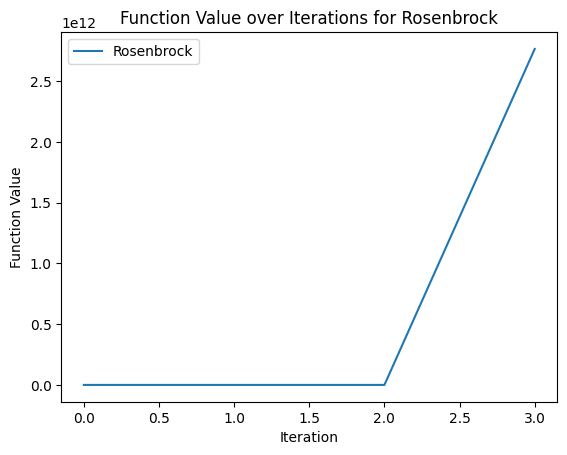

[100845488.0, 1.9263885369385977e+29, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

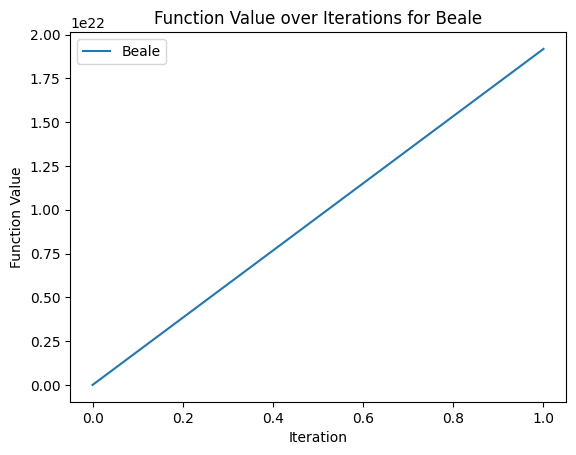

[17.29329490661621, 17.29327964782715, 17.29326629638672, 17.293251037597656, 17.293235778808594, 17.293222427368164, 17.293209075927734, 17.293195724487305, 17.293182373046875, 17.293169021606445, 17.293155670166016, 17.293142318725586, 17.293128967285156, 17.293115615844727, 17.29310417175293, 17.2930908203125, 17.293079376220703, 17.293067932128906, 17.293054580688477, 17.293041229248047, 17.29302978515625, 17.293018341064453, 17.293006896972656, 17.29299545288086, 17.292984008789062, 17.292972564697266, 17.29296112060547, 17.292949676513672, 17.292938232421875, 17.29292869567871, 17.292919158935547, 17.29290771484375, 17.292896270751953, 17.29288673400879, 17.292877197265625, 17.292865753173828, 17.292856216430664, 17.2928466796875, 17.292835235595703, 17.292827606201172, 17.292816162109375, 17.292808532714844, 17.292797088623047, 17.292789459228516, 17.29277801513672, 17.292770385742188, 17.292760848999023, 17.29275131225586, 17.292743682861328, 17.292736053466797, 17.292726516723

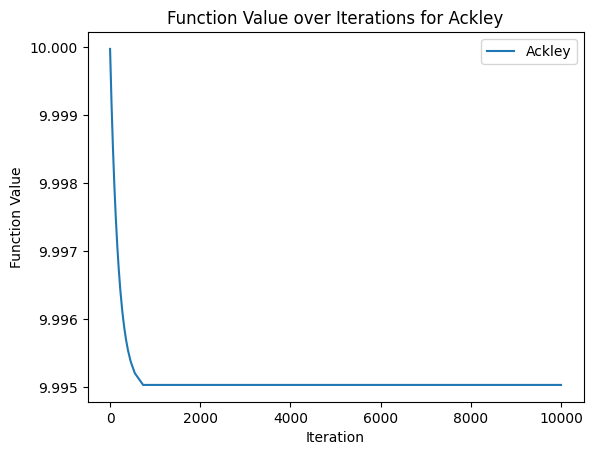

In [32]:
# For each function (rosenbrock, beale, ackley), use the optimize_function_using_sgd function to find x and y which minimize it and plot the value of function over all the iterations.

'''

YOUR CODE HERE


'''
# List of functions to optimize
functions = [rosenbrock, beale, ackley]
function_names = ['Rosenbrock', 'Beale', 'Ackley']

# Optimize each function and plot
for function, name in zip(functions, function_names):
    # Initialize x and y
    x = torch.tensor([10.0], requires_grad=True)
    y = torch.tensor([10.0], requires_grad=True)

    # Optimize
    _, _, function_values = optimize_function_using_sgd(function, x, y, learning_rate=0.0001, num_iterations=10000)
    print(function_values, name)

    # Plotting
    plt.figure()
    plt.plot(_, label=name)
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.title(f'Function Value over Iterations for {name}')
    #plt.xlim(0, num_iterations)
    plt.legend()
    plt.show()

In [33]:
# Now write a similar function to use Adam optimizer in Pytorch to optimize the objective function.

'''

YOUR CODE HERE


'''
def optimize_function_using_adam(function, x, y, learning_rate, num_iterations):
    # Initialize the Adam optimizer with the learning rate, optimizing over x and y
    optimizer = optim.Adam([x, y], lr=learning_rate)

    # Initialize lists to track x, y values, and function values over iterations
    x_values_over_iterations = []
    y_values_over_iterations = []
    function_values_over_iterations = []

    for i in range(num_iterations):
        optimizer.zero_grad()  # Zero the gradients
        function_value = function(x, y)  # Compute the function value
        function_value.backward()  # Backpropagate to compute the gradient of the function w.r.t. x and y
        optimizer.step()  # Apply gradients to update x and y values

        # Append current values of x, y, and the function value
        x_values_over_iterations.append(x.item())
        y_values_over_iterations.append(y.item())
        function_values_over_iterations.append(function_value.item())

    return x_values_over_iterations, y_values_over_iterations, function_values_over_iterations

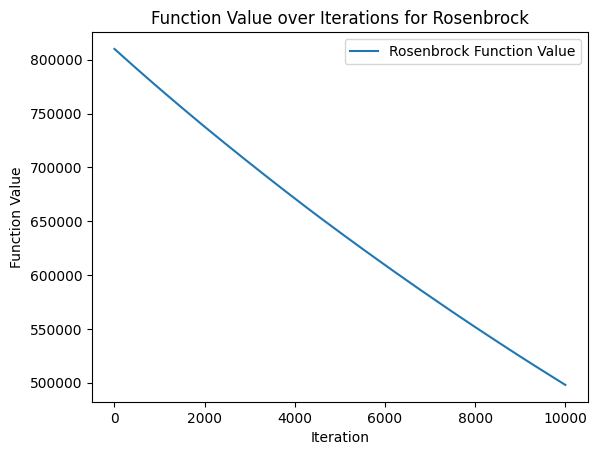

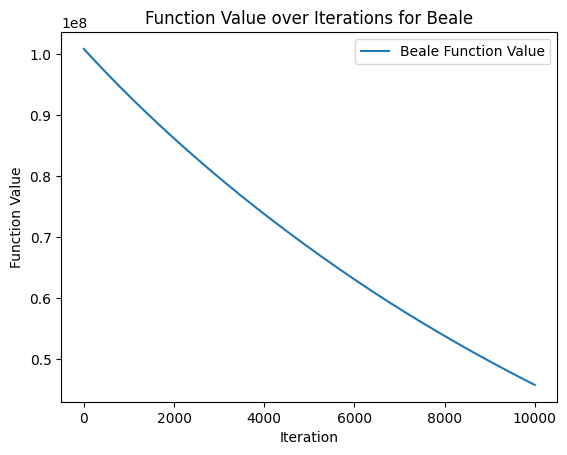

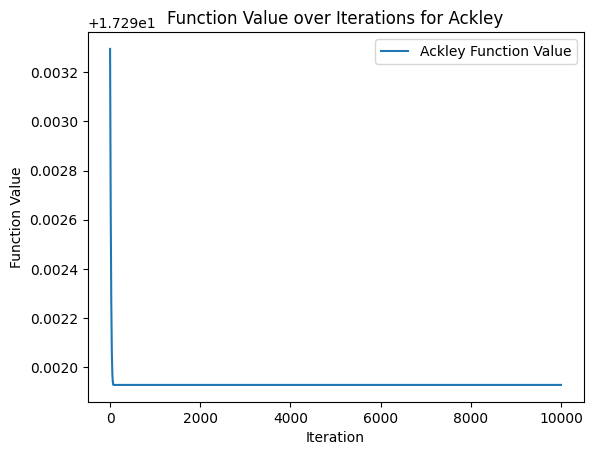

In [34]:
# For each function (rosenbrock, beale, ackley), use this function (Adam) to find x and y which minimize it and plot the value of function over all the iterations.

'''

YOUR CODE HERE


'''
# Optimize each function and plot
for function, name in zip(functions, function_names):
    # Initialize x and y to 10.0 with requires_grad=True
    x = torch.tensor([10.0], requires_grad=True)
    y = torch.tensor([10.0], requires_grad=True)

    # Use the optimize_function_using_adam function to optimize
    _, _, function_values = optimize_function_using_adam(function, x, y, learning_rate=0.0001, num_iterations=10000)

    # Plot the function values over iterations
    plt.figure()
    plt.plot(function_values, label=f'{name} Function Value')
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.title(f'Function Value over Iterations for {name}')
    plt.legend()
    plt.show()

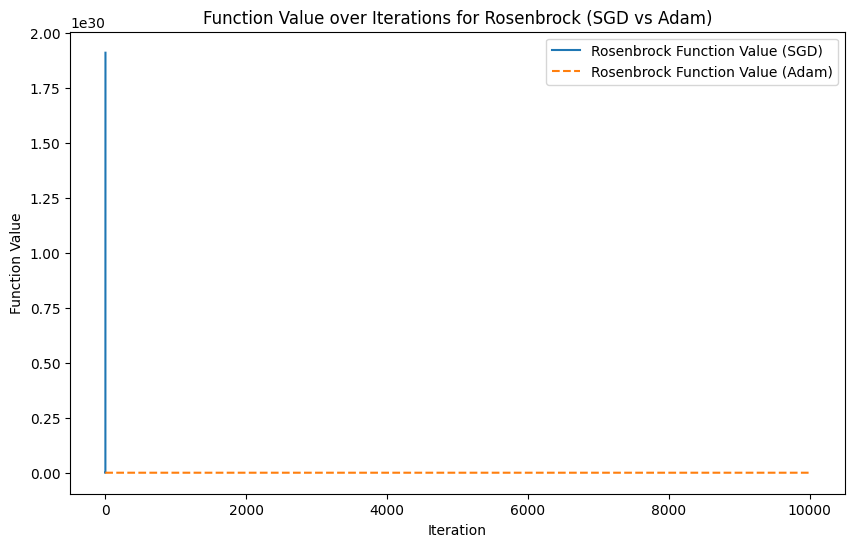

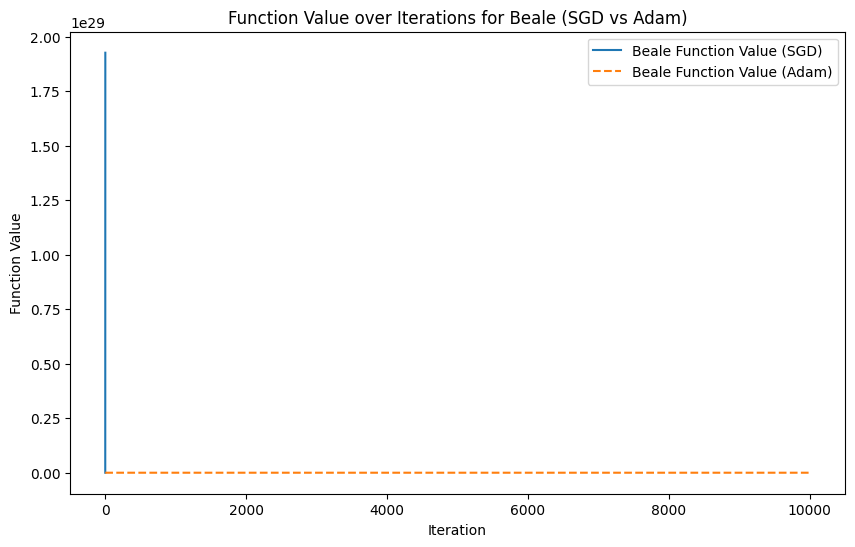

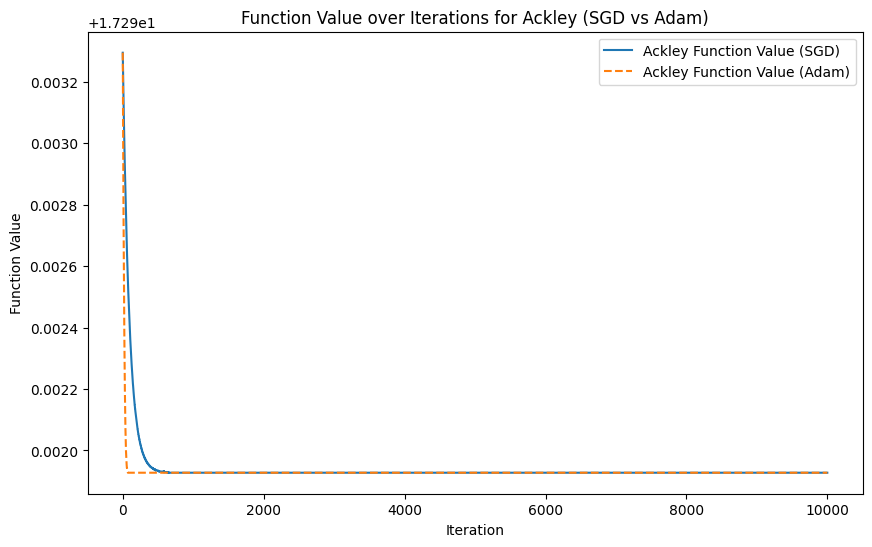

In [35]:
# Now in a single plot (for each function), plot the values of objective function over all iterations for both SGD and Adam.

'''

YOUR CODE HERE


'''
learning_rate = 0.0001
num_iterations = 10000

# Optimize each function and plot
for function, name in zip(functions, function_names):
    # Initialize x and y for SGD
    x_sgd = torch.tensor([10.0], requires_grad=True)
    y_sgd = torch.tensor([10.0], requires_grad=True)
    # Optimize using SGD
    _, _, function_values_sgd = optimize_function_using_sgd(function, x_sgd, y_sgd, learning_rate, num_iterations)

    # Initialize x and y for Adam
    x_adam = torch.tensor([10.0], requires_grad=True)
    y_adam = torch.tensor([10.0], requires_grad=True)
    # Optimize using Adam
    _, _, function_values_adam = optimize_function_using_adam(function, x_adam, y_adam, learning_rate, num_iterations)

    # Plotting the function values over iterations for both optimizers
    plt.figure(figsize=(10, 6))
    plt.plot(function_values_sgd, label=f'{name} Function Value (SGD)')
    plt.plot(function_values_adam, label=f'{name} Function Value (Adam)', linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.title(f'Function Value over Iterations for {name} (SGD vs Adam)')
    plt.legend()
    plt.show()

What are your observations on the convergence of these functions when optimized with SGD and Adam?

You Response: When given same learning rate and the number of iterations, Adam performs way better and the functions value convergence in very less number of iterations compared to SGD.

#### Neural Nets with PyTorch

Finally, let's see how to use PyTorch to build, train and evaluate neural networks. Consider the XOR operation. We will build a simple neural network who's job is to mimic a XOR operation.

In [36]:
# Define our 'dataset'

inps = [[0, 0], [0, 1], [1, 0], [1, 1]]
labs = [[0], [1], [1], [0]]

inputs = [torch.tensor(x, dtype=torch.float) for x in inps]
labels = [torch.tensor(x, dtype=torch.float) for x in labs]

print(inputs)
print(labels)

[tensor([0., 0.]), tensor([0., 1.]), tensor([1., 0.]), tensor([1., 1.])]
[tensor([0.]), tensor([1.]), tensor([1.]), tensor([0.])]


Now let's define our model and call it XORNet ✨
You can refer the documentation regarding defining models here: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

In [37]:
import torch.nn as nn
import torch.nn.functional as F

# We define a model by subclassing nn.Module class from PyTorch
class XORNet(nn.Module):

  # In the __init__ method we define and initialize model paramters.
  def __init__(self):
    super(XORNet, self).__init__()
    self.fc1 = nn.Linear(2, 3) # Linear layer with 2 inputs and 3 neurons. (Hidden layer)
    self.fc2 = nn.Linear(3, 1) # Linear layer with 3 inputs and 1 neuron. (Output layer)

  def forward(self, x):
        x = self.fc1(x) # We pass the input x to the first layer
        x = F.sigmoid(x) # We apply the sigmoid activation function to the output of first layer
        x = self.fc2(x) # Finally we pass the output from the previous layer to the output layer
        return x

In [38]:
model = XORNet() # Create an object of the class we defined in the previous cell. This is an instance of our model.
criterion = nn.MSELoss() # Create an object of the MSELoss class in PyTorch. This is the criterion used for calculating loss which is backpropagated to the model
optimizer = optim.SGD(model.parameters(), lr=0.1) # Initialize an SGD optimizer. Link it to the model parameters.

In [39]:
epochs = 10000

# Now train the model

for idx in range(0, epochs):
    for input, target in zip(inputs, labels):
        optimizer.zero_grad()   # zero the gradient buffers
        output = model(input)
        loss = criterion(output, target.float())
        loss.backward()
        optimizer.step()    # Does the update
    if idx % 100 == 0:
        print("Epoch {: >8} Loss: {}".format(idx, loss.data.numpy()))

Epoch        0 Loss: 0.2548157274723053
Epoch      100 Loss: 0.3707606792449951
Epoch      200 Loss: 0.3445587158203125
Epoch      300 Loss: 0.30928751826286316
Epoch      400 Loss: 0.2398812174797058
Epoch      500 Loss: 0.047630567103624344
Epoch      600 Loss: 6.772751657990739e-05
Epoch      700 Loss: 4.8138421249177554e-08
Epoch      800 Loss: 4.9467985263618175e-11
Epoch      900 Loss: 1.2789769243681803e-13
Epoch     1000 Loss: 2.877698079828406e-13
Epoch     1100 Loss: 4.298783551348606e-13
Epoch     1200 Loss: 4.298783551348606e-13
Epoch     1300 Loss: 4.298783551348606e-13
Epoch     1400 Loss: 4.298783551348606e-13
Epoch     1500 Loss: 4.298783551348606e-13
Epoch     1600 Loss: 4.298783551348606e-13
Epoch     1700 Loss: 4.298783551348606e-13
Epoch     1800 Loss: 4.298783551348606e-13
Epoch     1900 Loss: 4.298783551348606e-13
Epoch     2000 Loss: 4.298783551348606e-13
Epoch     2100 Loss: 4.298783551348606e-13
Epoch     2200 Loss: 4.298783551348606e-13
Epoch     2300 Loss: 4.

Now let's see how our trained model performs:

In [40]:
for input, target in zip(inputs, labels):
    output = model(input)
    print("For input {}, {} model predicted {}".format(
        int(input.data.numpy()[0]),
        int(input.data.numpy()[1]),
        round(float(output.data.numpy()[0]))
    ))

For input 0, 0 model predicted 0
For input 0, 1 model predicted 1
For input 1, 0 model predicted 1
For input 1, 1 model predicted 0


In [41]:
#used ChatGPT for reference.